<a href="https://colab.research.google.com/github/shaaidaar/breast-cancer-model/blob/main/Breast%20Cancer%20Classification%20using%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Overview and Loading
The dataset used in this project is a Breast Cancer Diagnostic dataset, sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) and hosted on [GitHub](https://github.com/abdelDebug/Breast-Cancer-Dataset/).

The dataset includes diagnostic measurements of breast masses collected from digitized images of fine needle aspirates (FNA) of breast tumors. The main goal is to use these measurements to predict whether a tumor is benign (B) or malignant (M).

In [ ]:
import pandas as pd

#Read the data from a URL and look at the first few rows:

url = "https://raw.githubusercontent.com/abdelDebug/Breast-Cancer-Dataset/main/breast_cancer_dataset.csv"
try:
  df = pd.read_csv(url)
  display(df.head())
except FileNotFoundError:
    print("Error: 'heart_disease.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check its format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Task 1: Data Exploration:**

In [ ]:
#Dataset shape and data types:

print("Shape of the DataFrame:", df.shape)
print("\nData Types:")
df.info()

Shape of the DataFrame: (569, 32)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-

As we could also see in thew dataset file, we have 32 columns and 569 rows in the dataset. All the features are float, except for the ID which is integer and the diagnosis which is object. The id column does not contain any predictive value for the diagnosis and also can add **noise** to the model. So we I drop it and continue.

In [ ]:
# Drop the 'id' column
df.columns = df.columns.str.strip()
df.drop(columns='id', inplace=True)

**Investigating the distribution of the target variable:**

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


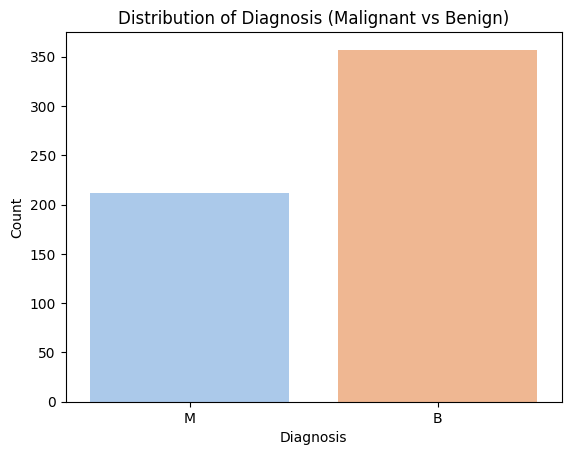

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='diagnosis', hue='diagnosis', palette='pastel', legend=False)
plt.title("Distribution of Diagnosis (Malignant vs Benign)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

**Statistic for numerical features:**

In [ ]:
# Basic descriptive statistics for all numeric features
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000         

**Explore relationships between features and the target:**

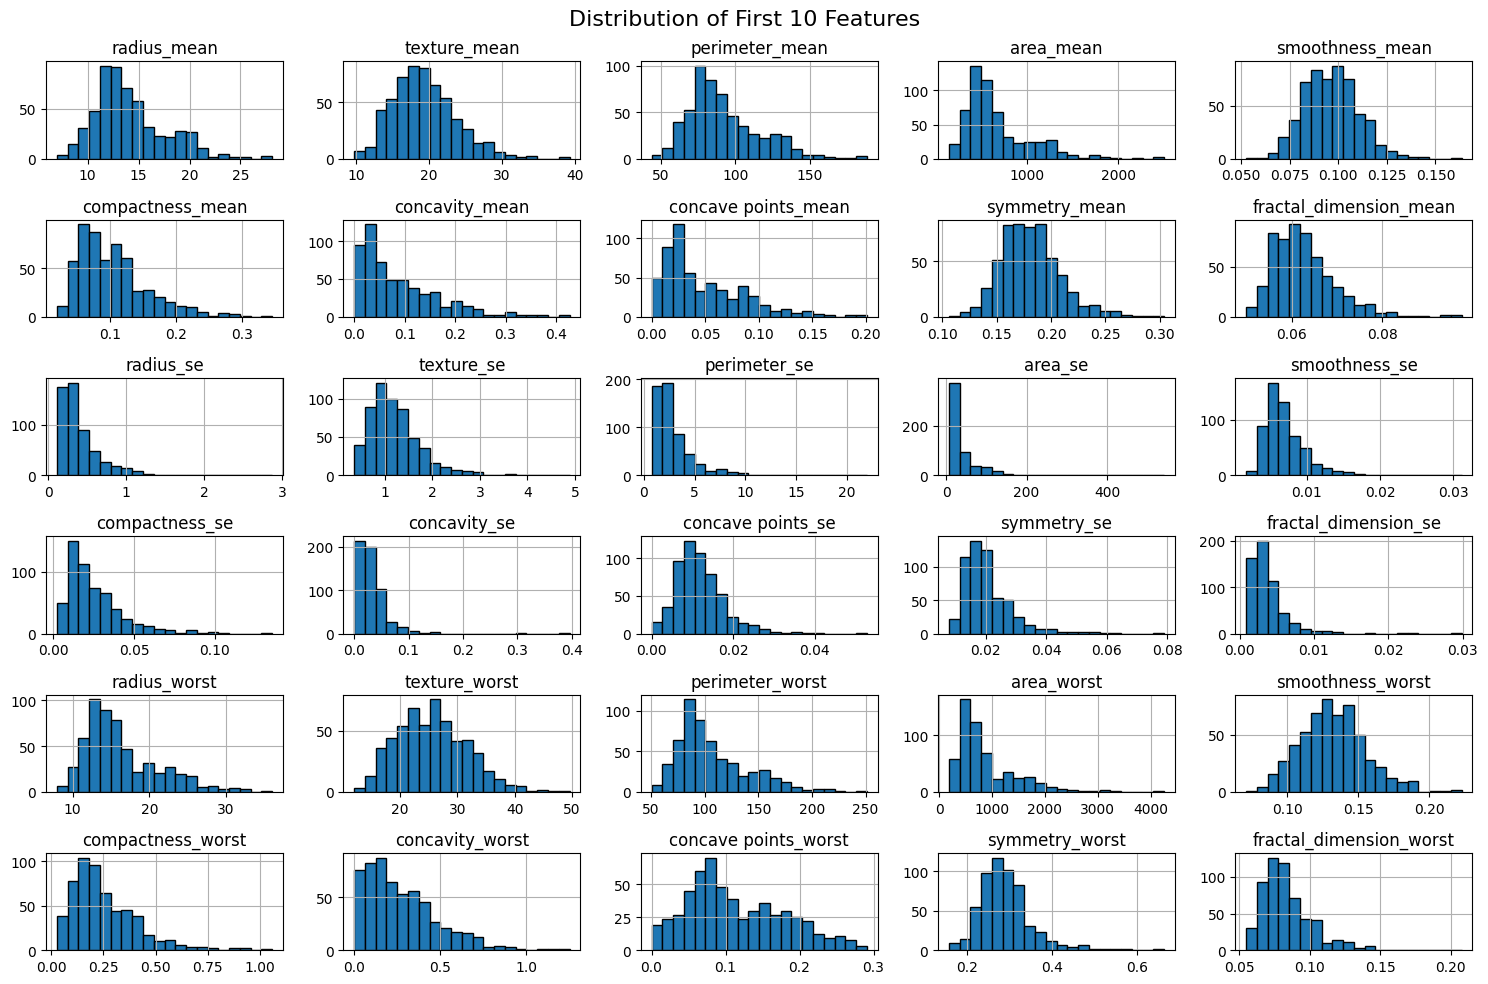

In [ ]:
# Select only numeric features (exclude 'diagnosis')
numeric_features = df.drop(columns=['diagnosis']).columns

# Plot histograms for the features
df[numeric_features[:30]].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Distribution of First 10 Features", fontsize=16)
plt.tight_layout()
plt.show()

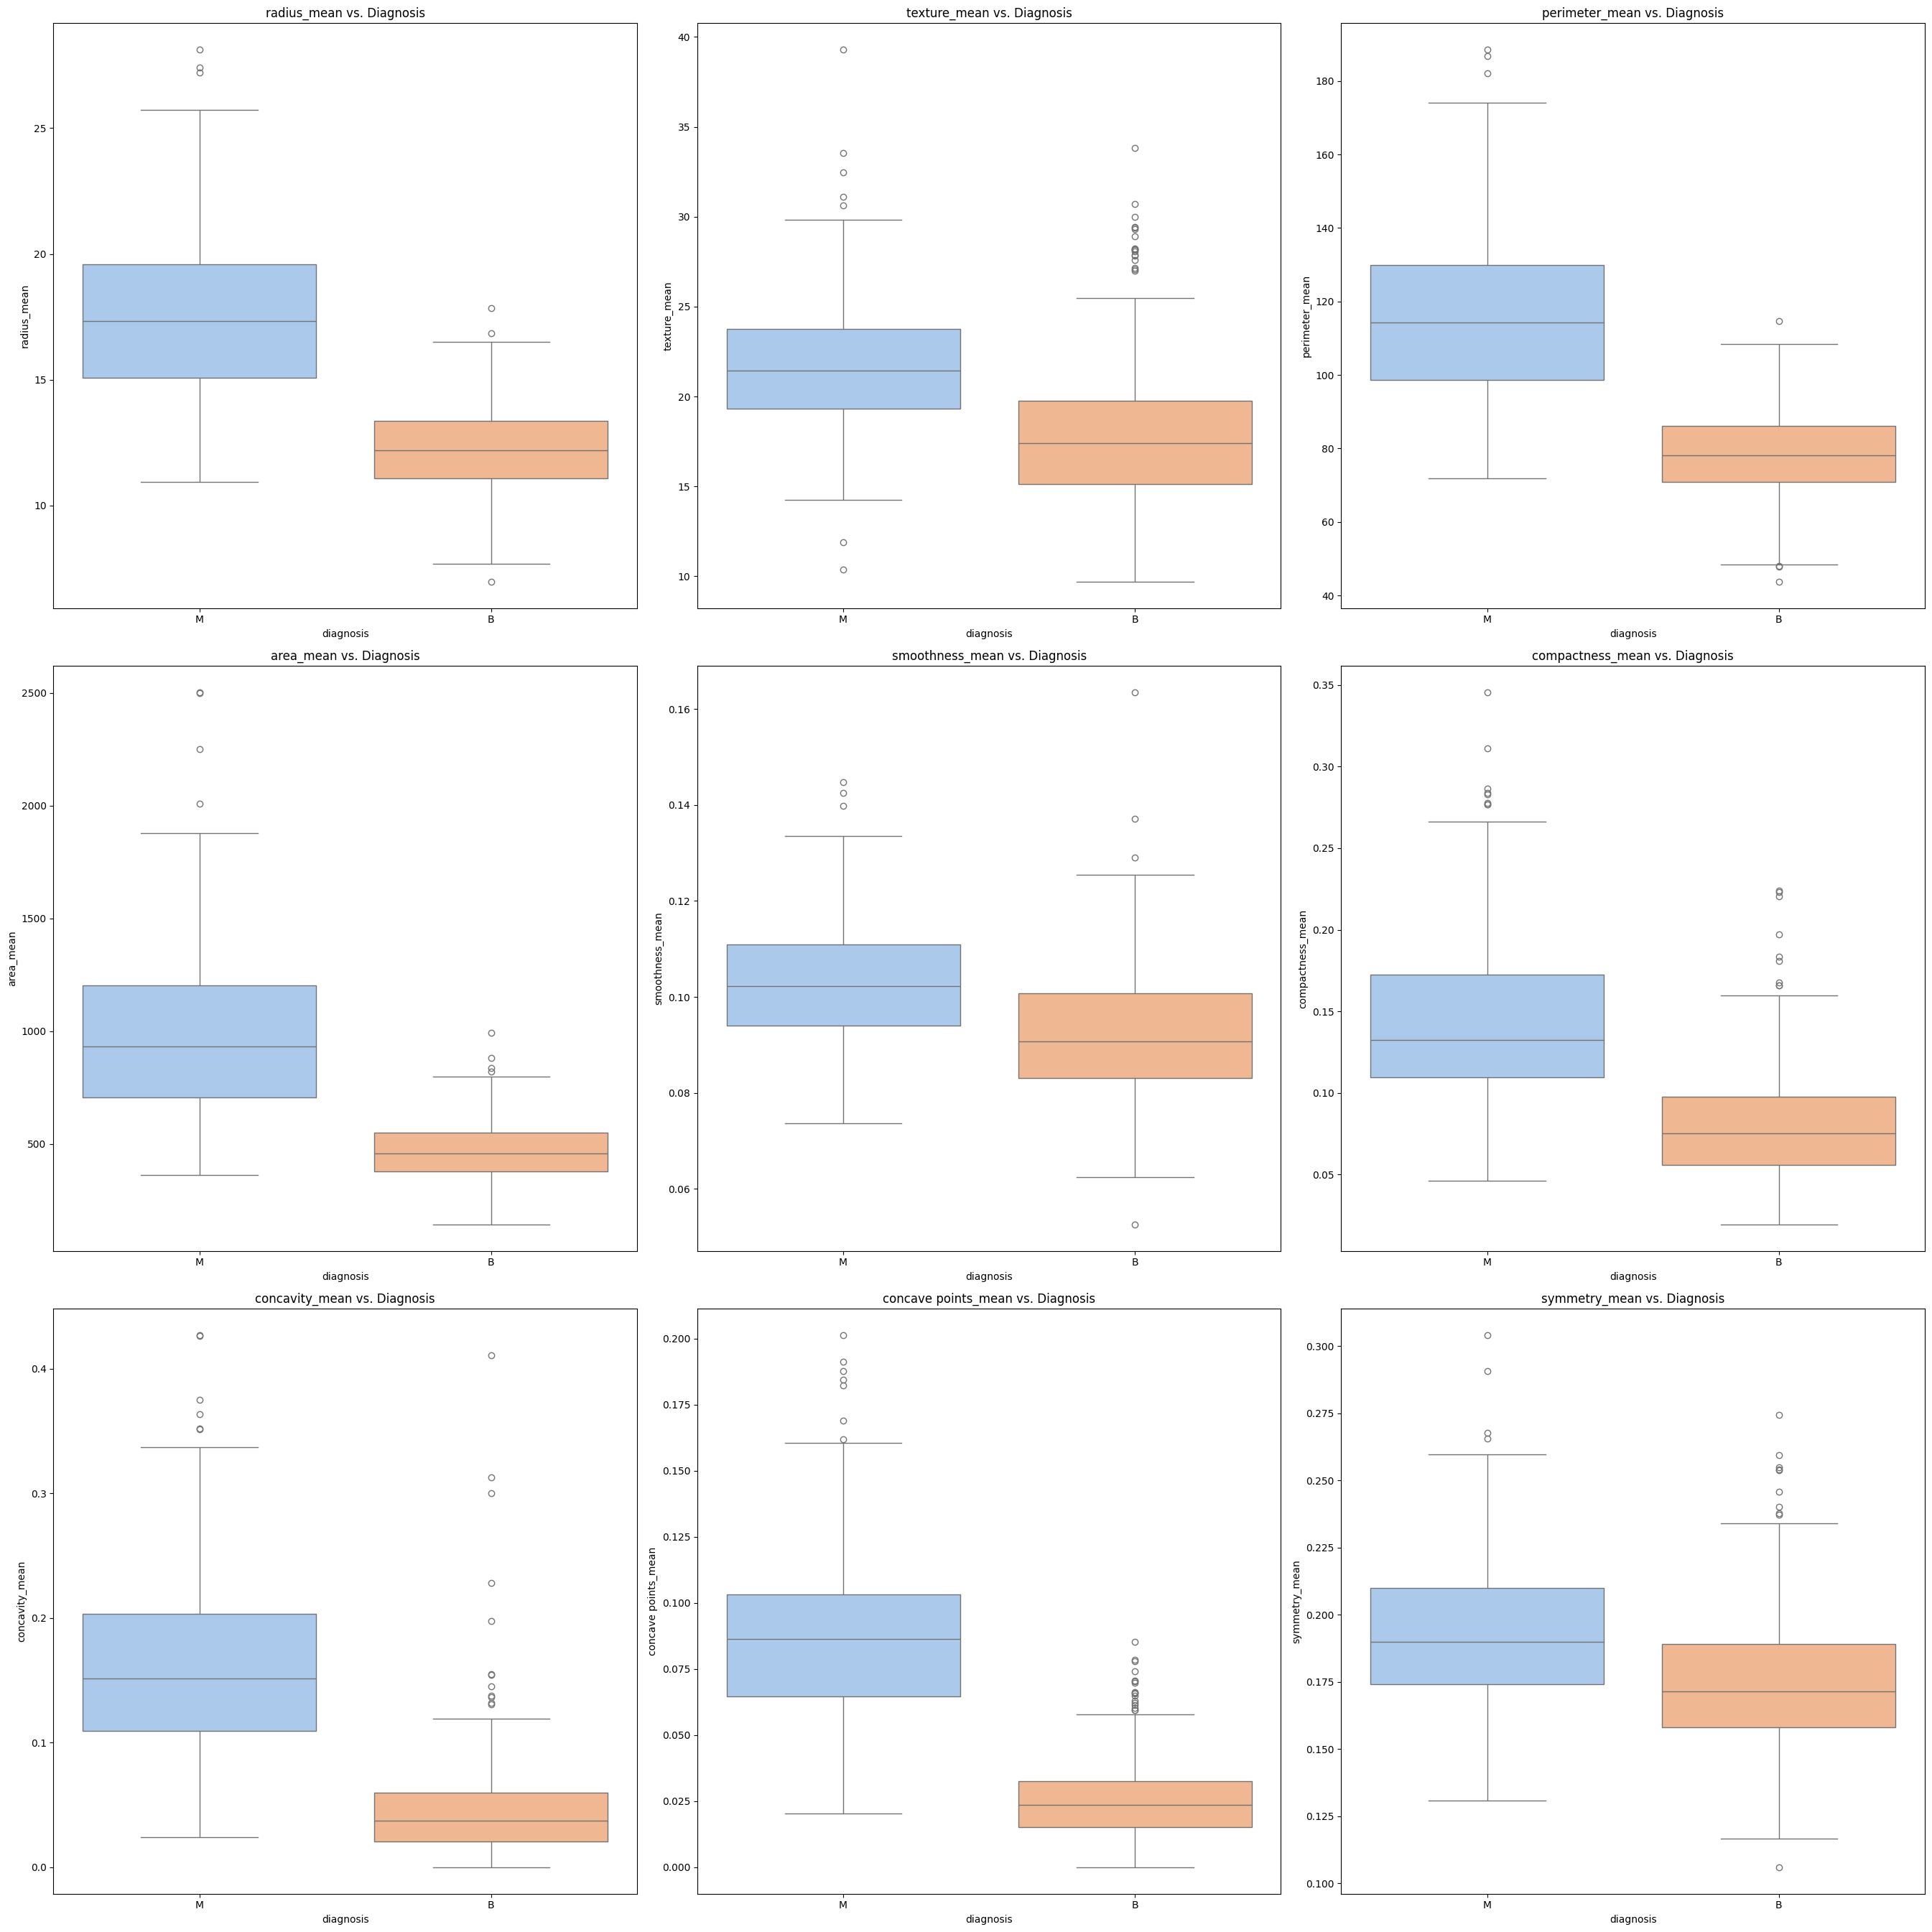

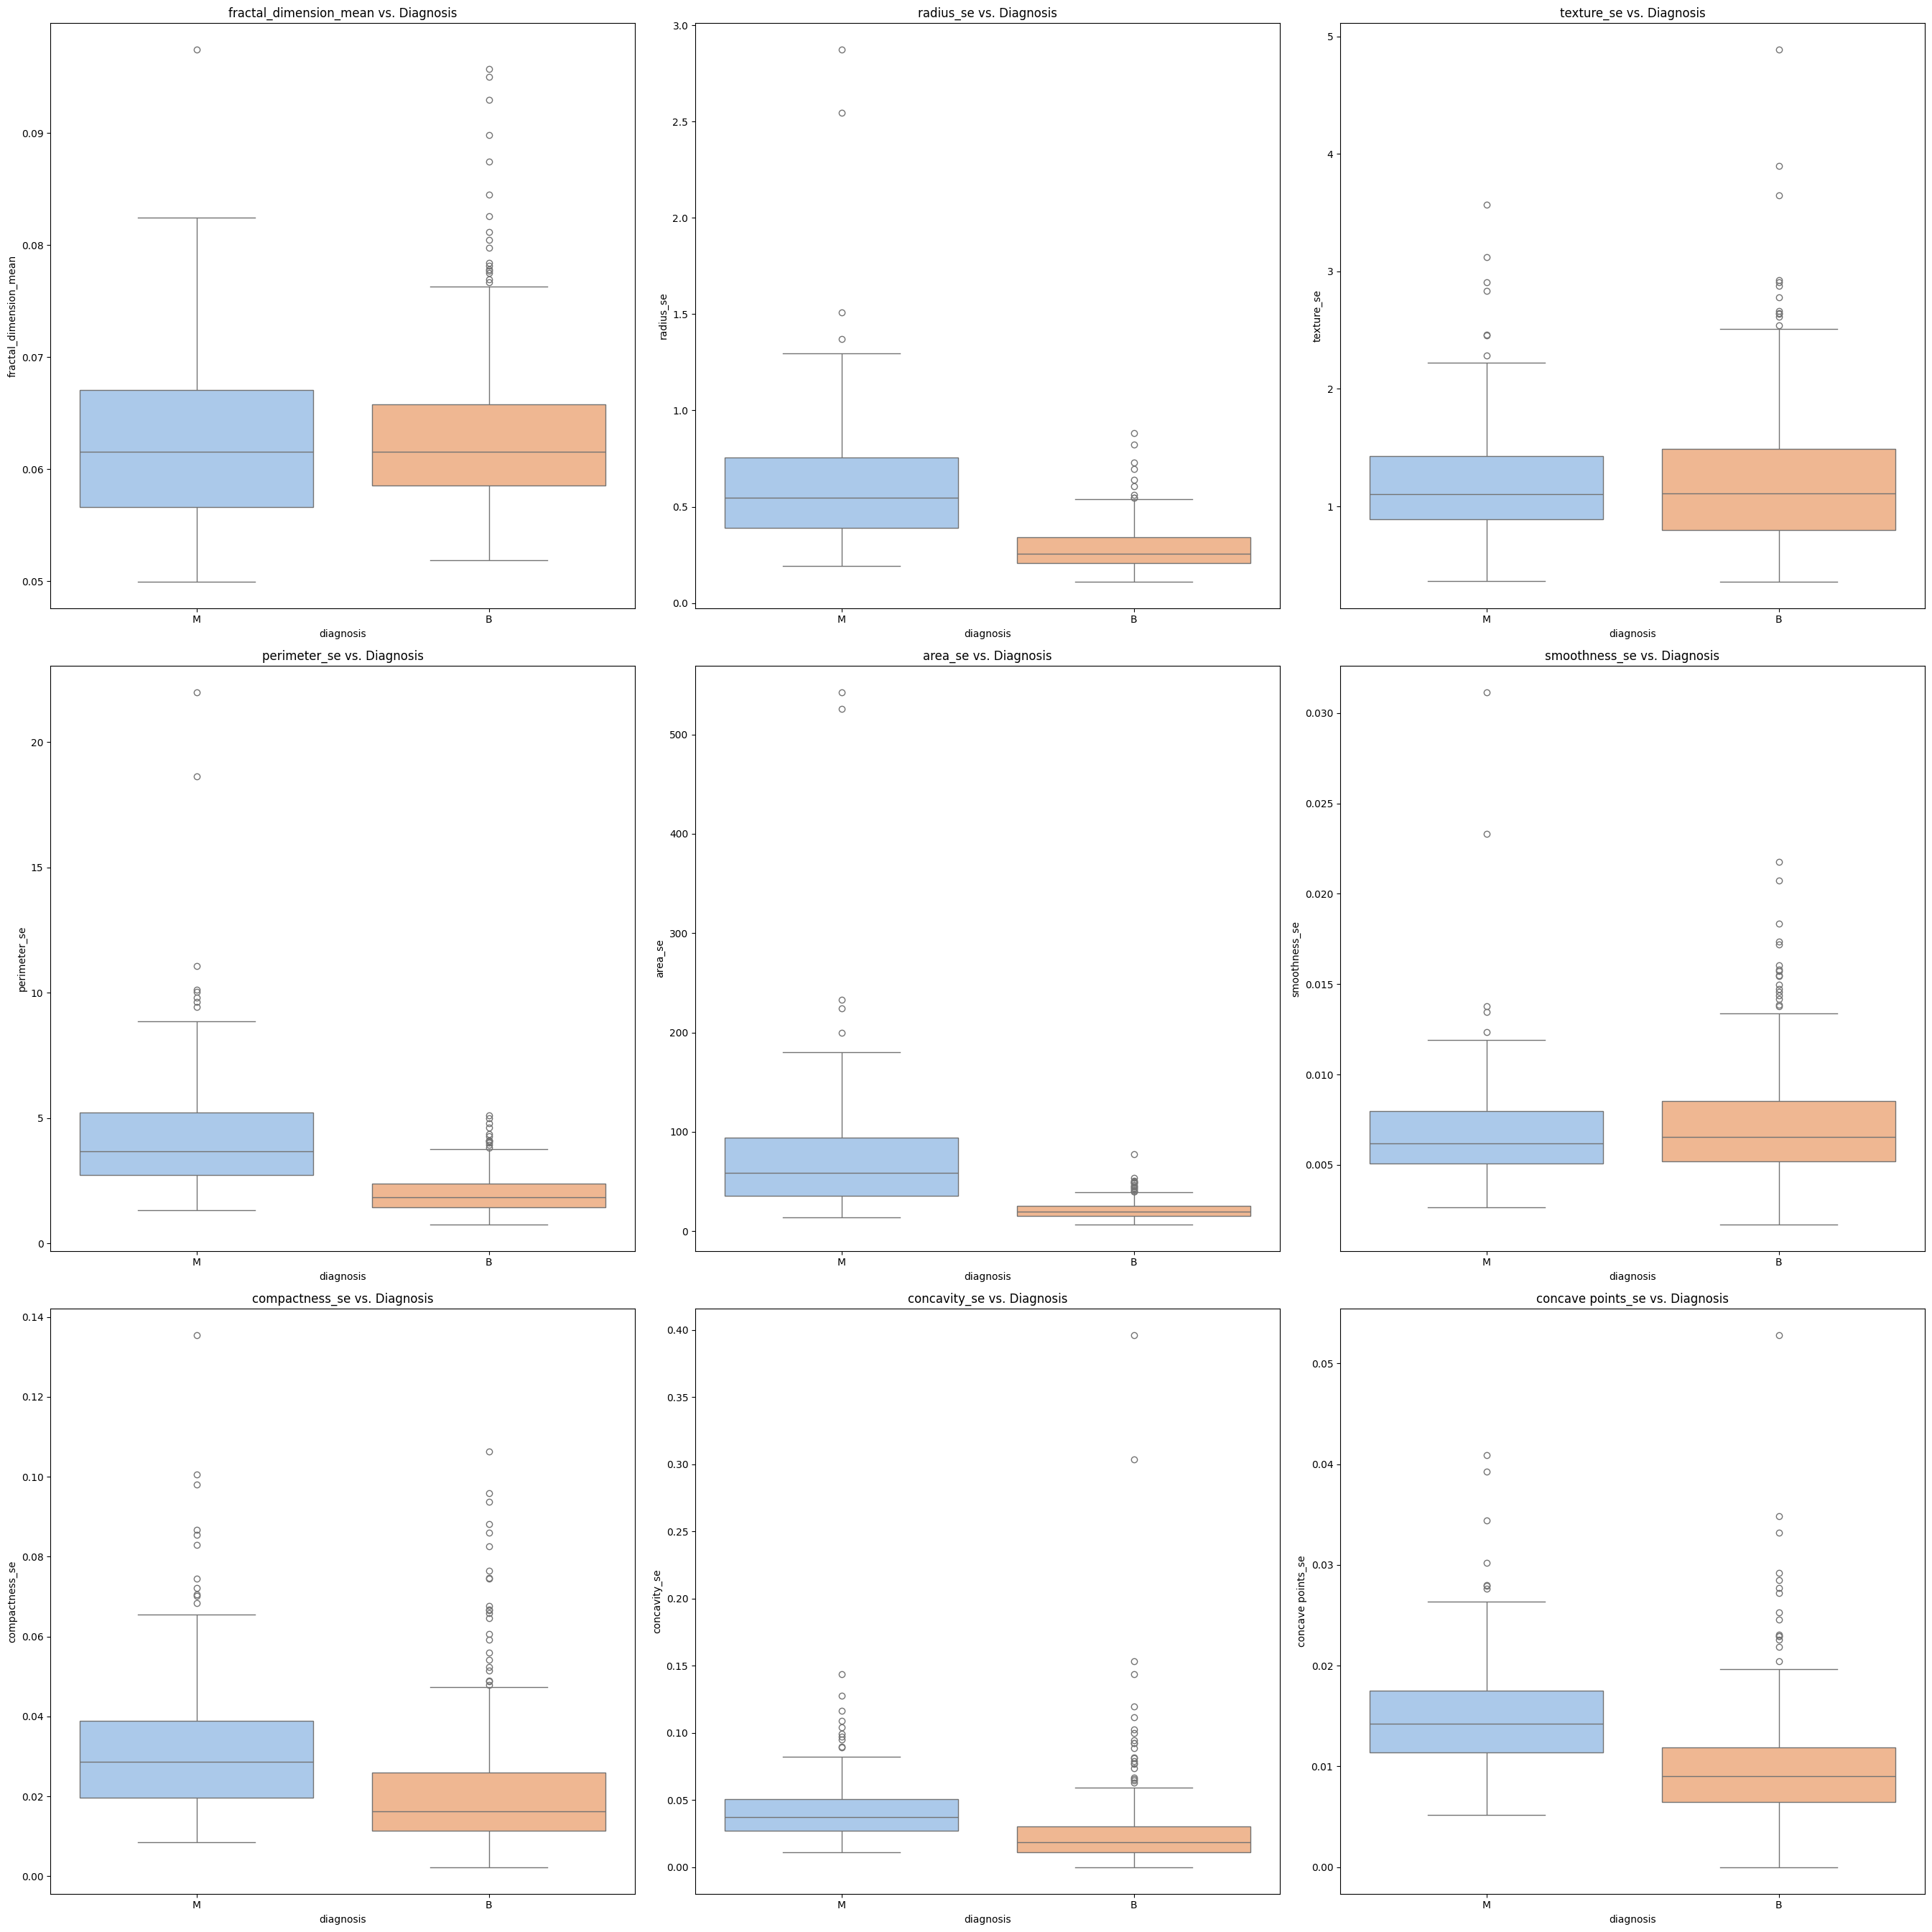

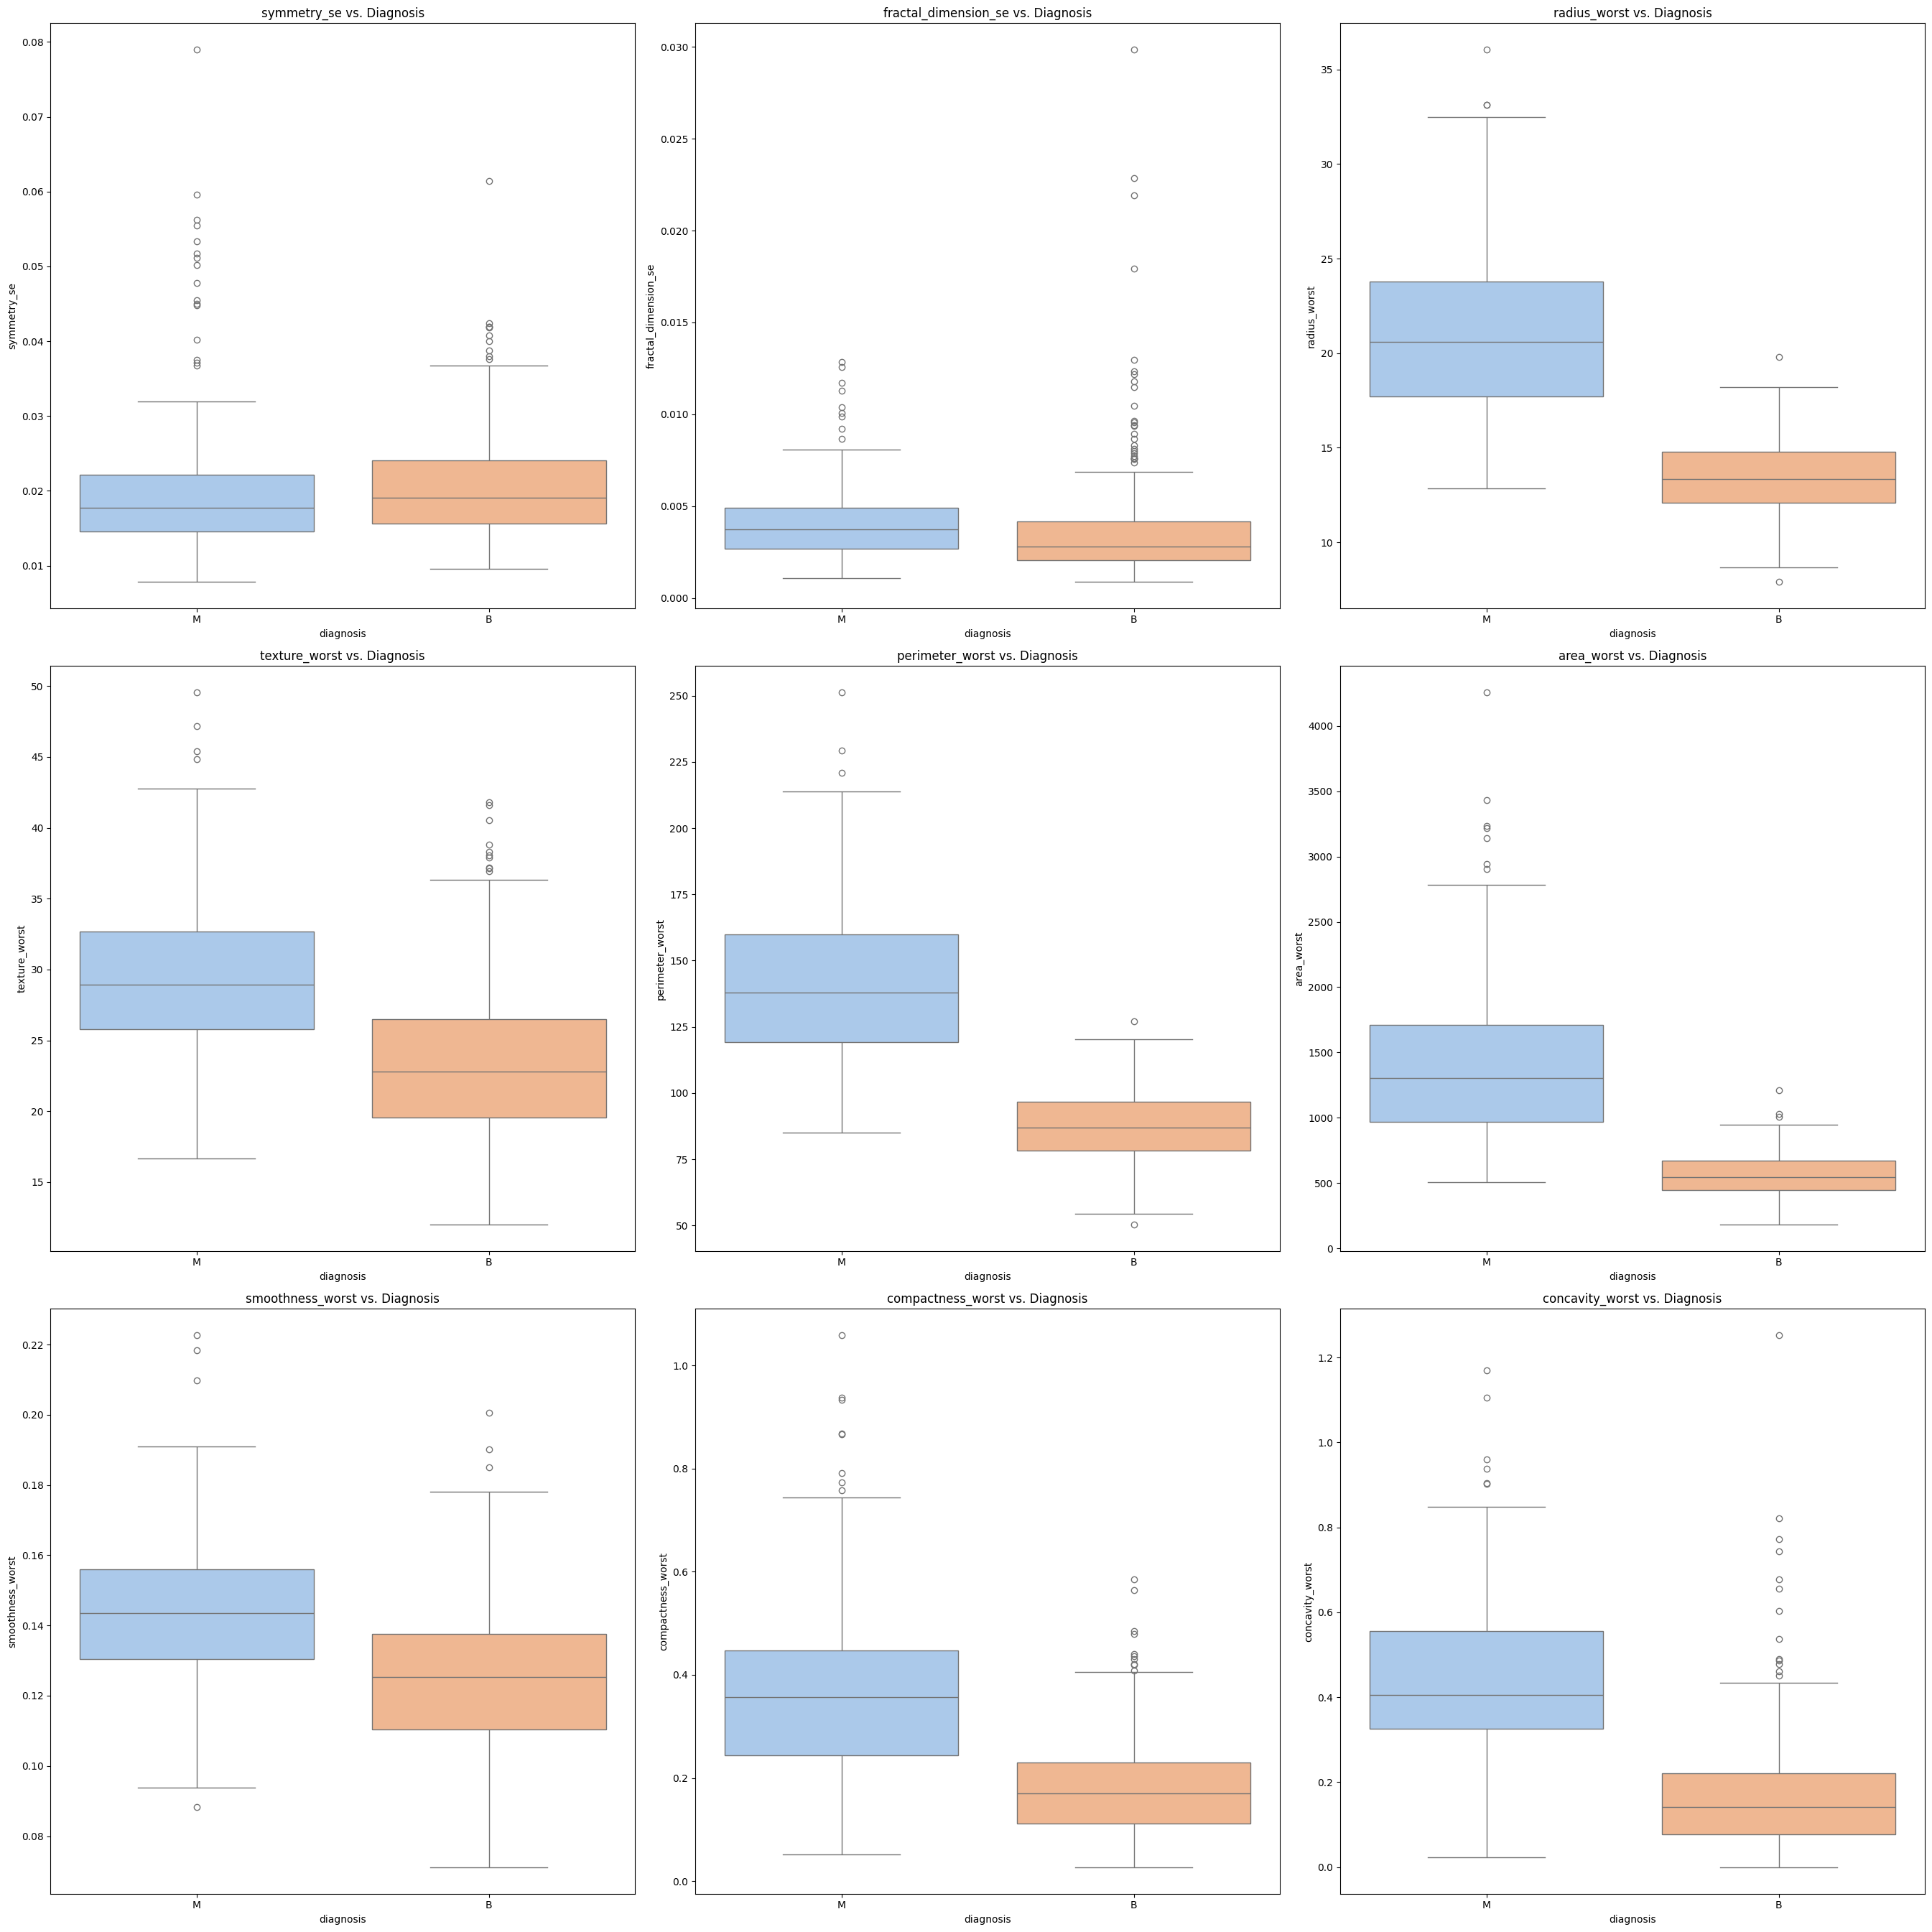

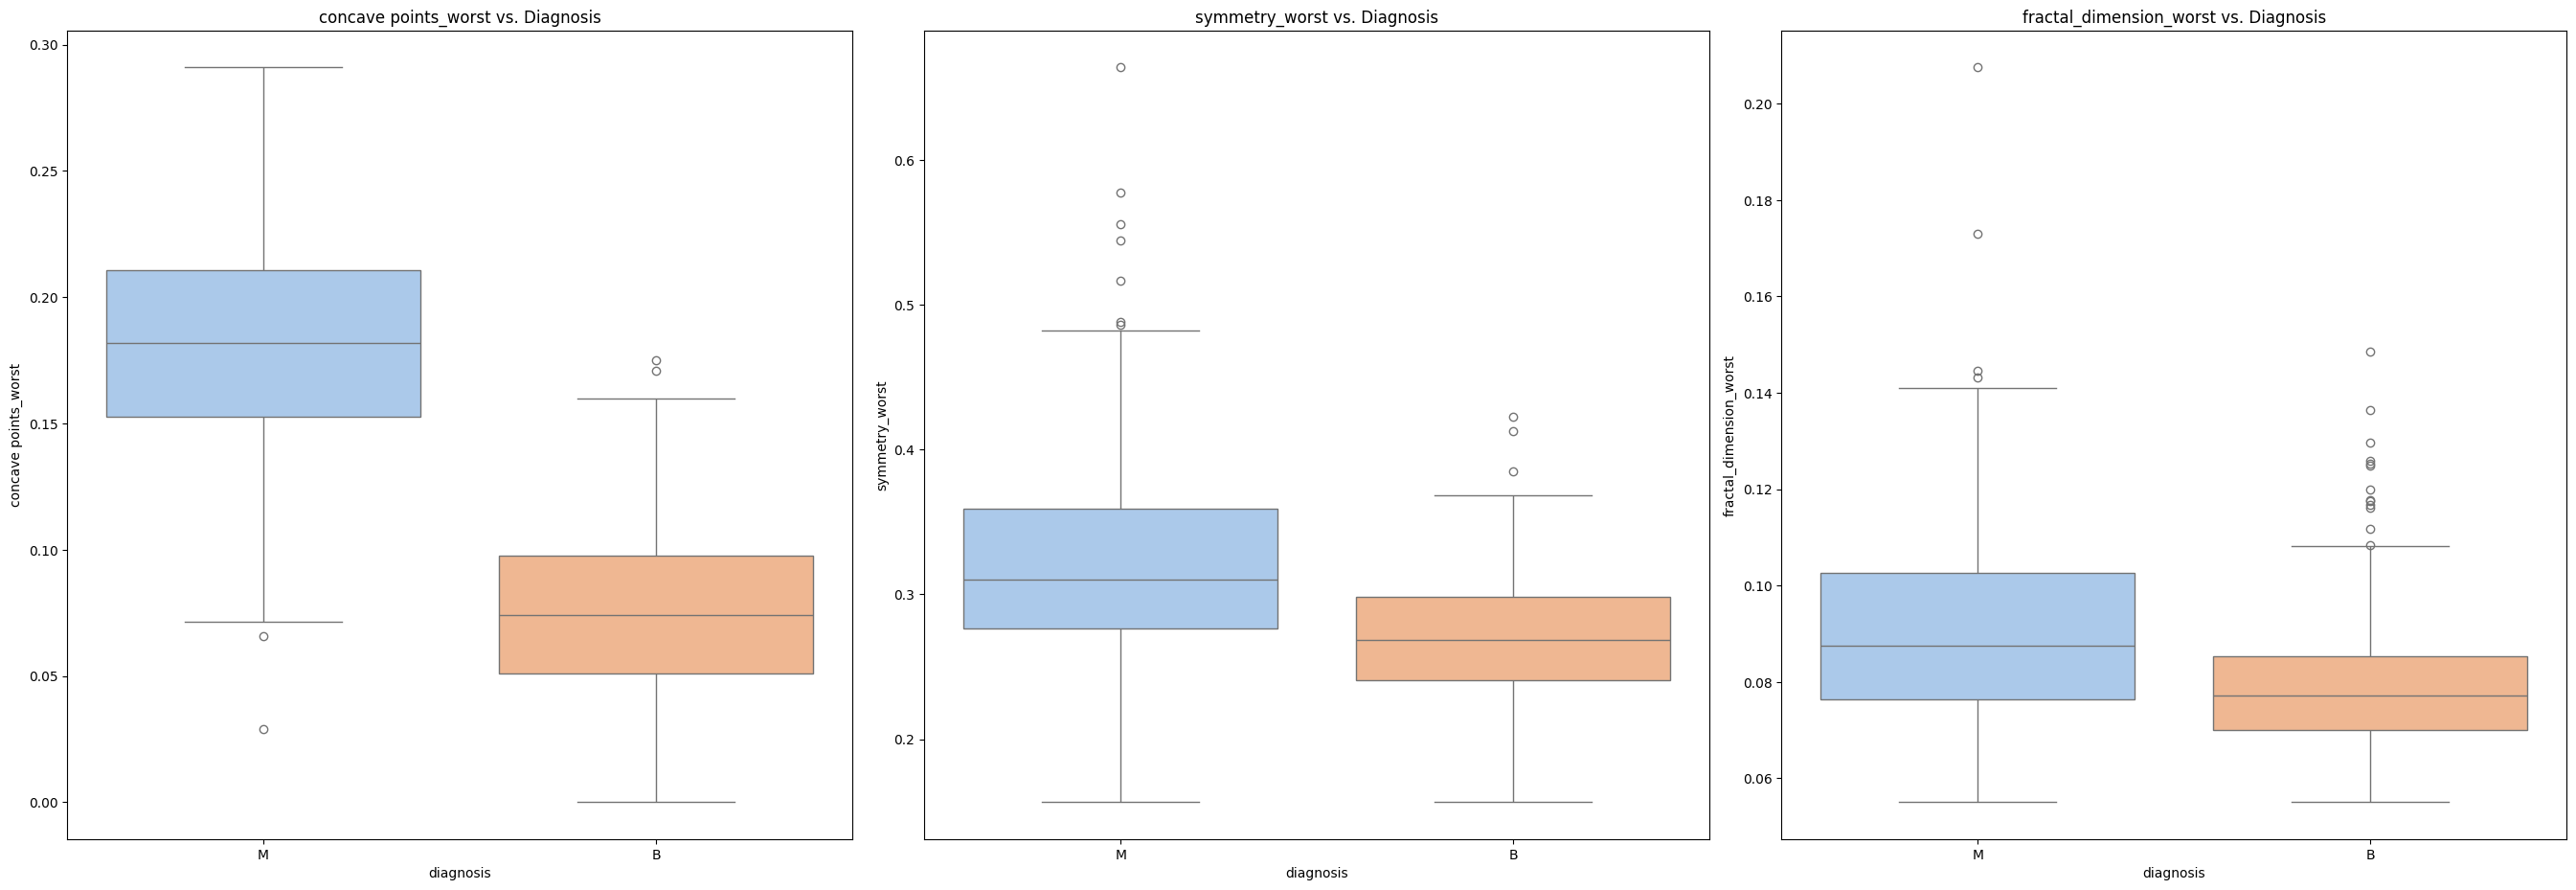

In [ ]:
# Create boxplots for each feature vs diagnosis
num_features_to_plot = len(numeric_features)
plots_per_figure = 9
num_figures = (num_features_to_plot + plots_per_figure - 1) // plots_per_figure

for fig_num in range(num_figures):
    plt.figure(figsize=(27, 27))
    start_index = fig_num * plots_per_figure
    end_index = min((fig_num + 1) * plots_per_figure, num_features_to_plot)

    for i, feature_index in enumerate(range(start_index, end_index)):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x='diagnosis', y=numeric_features[feature_index], hue='diagnosis', data=df, palette='pastel', legend=False)
        plt.title(f'{numeric_features[feature_index]} vs. Diagnosis')

    plt.tight_layout()
    plt.show()

I have visualized all the features vs diagnosis (target) using box plots. While analyzing the plots, we should consider that the features in which their box for malignant has less overlap with their benign box, can be counted as a stronger indicator. Also the mean line in both boxes in each plot is important. For example we can observe that malignant tumors tend to have larger mean radius values, so radius_mean is a strong indicator. On the other hand, for texture_mean, although malignant tends to have a higher range, some overlap remains with the benign box, so I will combine it with other features (e.g., radius_mean, perimeter_mean, etc.) in our model to improve accuracy (as it is not a strong indicator).


**Pearson Correlation Matrix:**

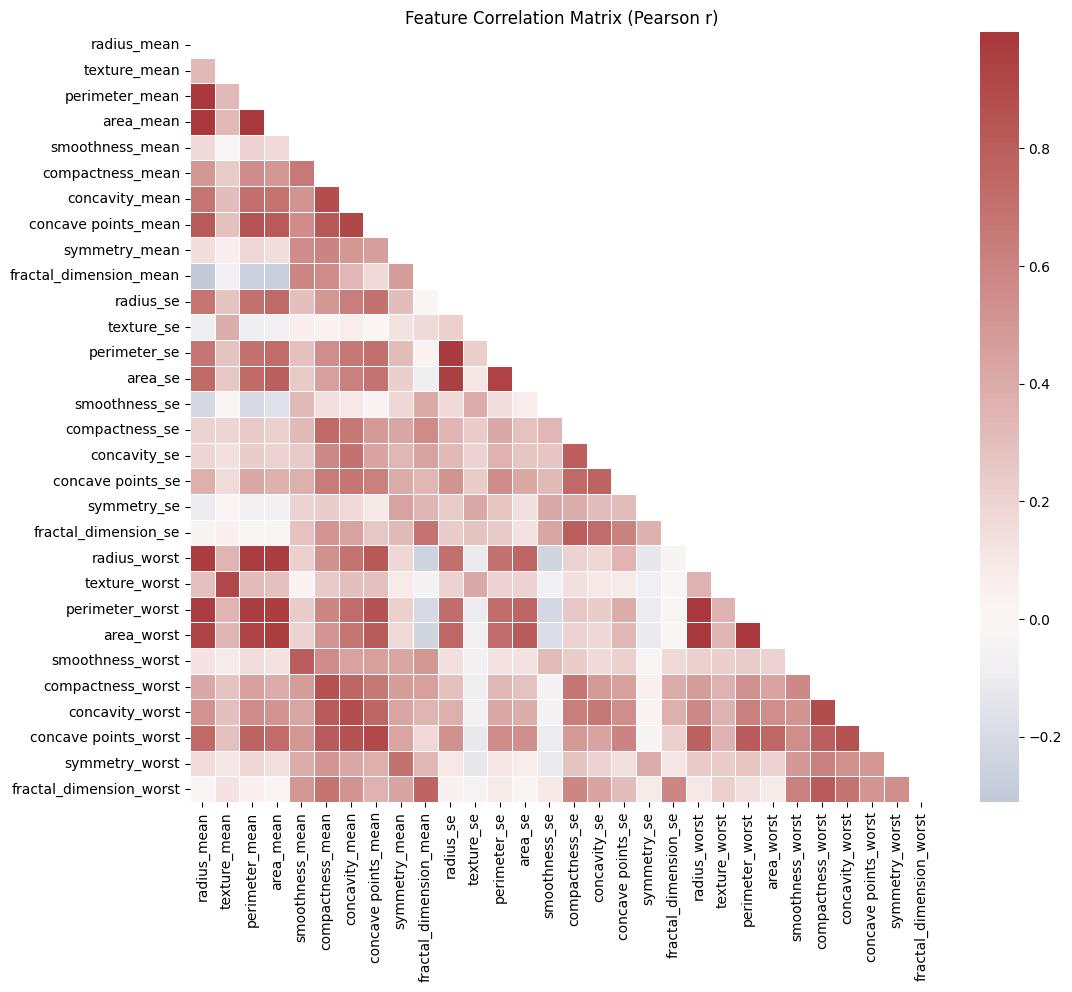

In [ ]:


corr_matrix = numeric_features.corr()

#Plot a heatmap (showing only the upper triangle to avoid redundancy)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='vlag',
    center=0,
    annot=False,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Feature Correlation Matrix (Pearson r)")
plt.show()

Since the target value is an object, we need to convert it to a numeric form to be able to compute the correlations of it with the features in our dataframe:

In [ ]:
df_encoded = df.copy() #Make a copy so we don’t overwrite df

df_encoded['diagnosis'] = df_encoded['diagnosis'].map({'M': 1, 'B': 0})

print(df_encoded['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


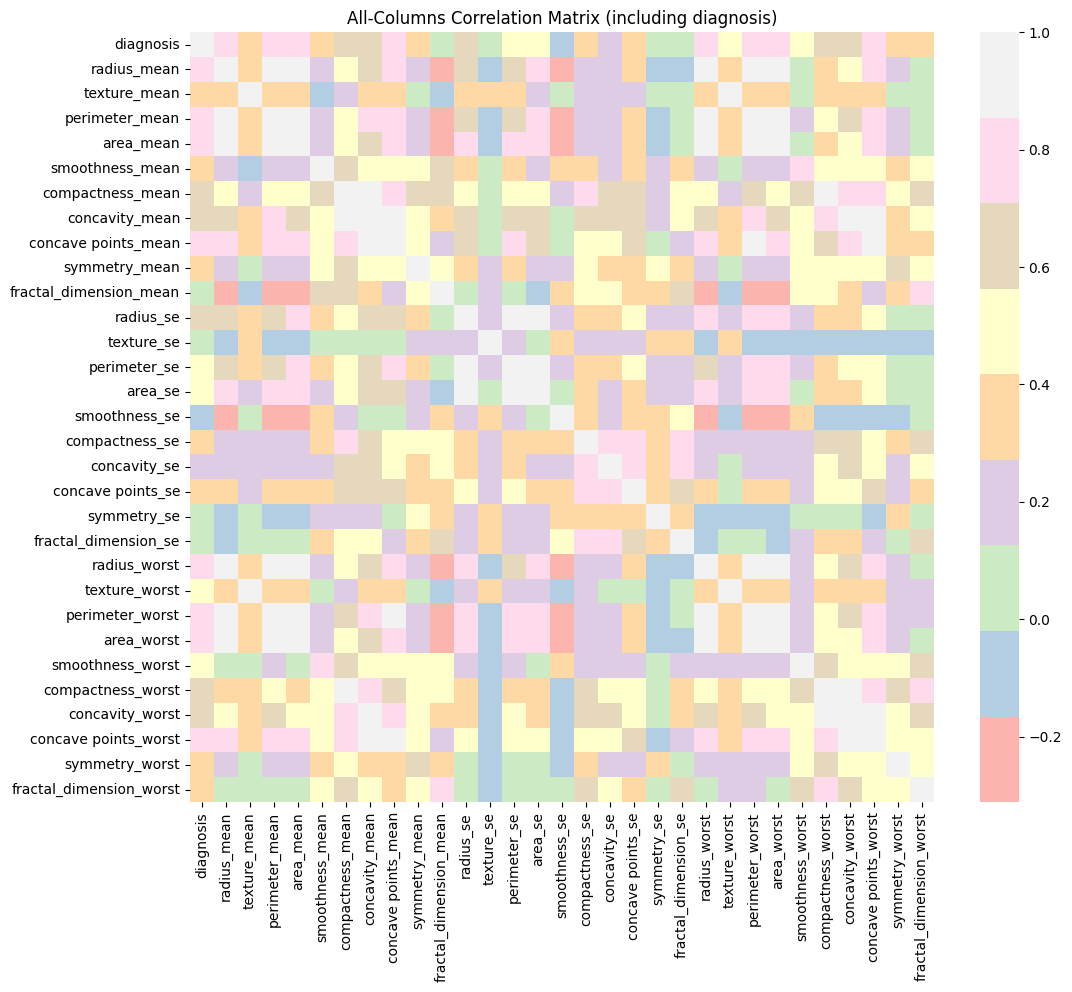

In [ ]:
import numpy as np
#Compute Pearson correlations on the entire encoded dataframe
plt.figure(figsize=(12, 10))
corr_all = df_encoded.corr()

# Show a heatmap
sns.heatmap(corr_all, annot=False, cmap='Pastel1', fmt=".2f")
plt.title('All‐Columns Correlation Matrix (including diagnosis)')
plt.show()

In [ ]:
# Extract all correlations with diagnosis (drop the diagnosis→diagnosis = 1.00 entry)
target_corr = corr_all['diagnosis'].drop('diagnosis')

# Sort by absolute value (descending)
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

print("Features (by |r|) with diagnosis (descending):\n")
print(target_corr_sorted.head(30))


Features (by |r|) with diagnosis (descending):

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se   

**Correlations (|r|) with diagnosis:**

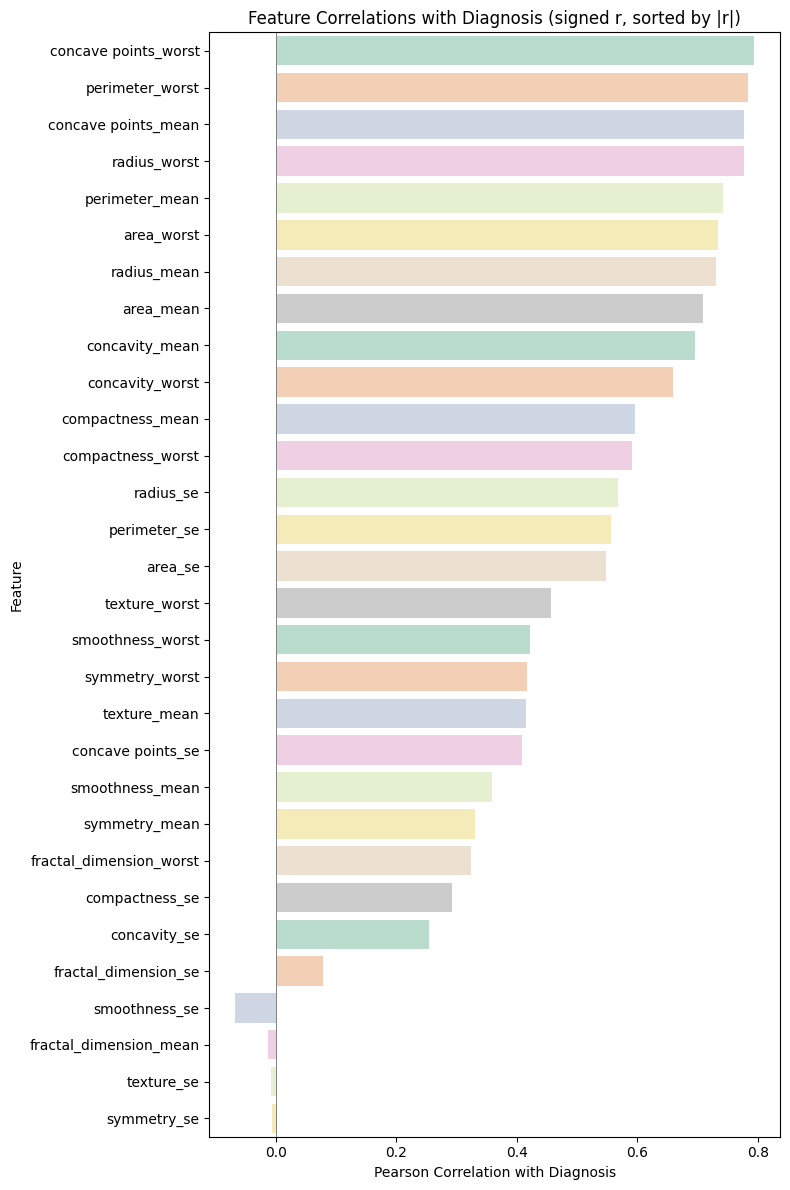

In [ ]:
abs_target_corr = target_corr.abs().sort_values(ascending=False)

# Use all features (sorted by |r|) for the bar chart
all_features = abs_target_corr.index

#Create a DataFrame (or Series) for plotting, using the signed r values but ordered by |r|
bar_data = target_corr[all_features]

plt.figure(figsize=(8, 12))
sns.barplot(x=bar_data.values, y=bar_data.index, palette='Pastel2')
plt.title("Feature Correlations with Diagnosis (signed r, sorted by |r|)")
plt.xlabel("Pearson Correlation with Diagnosis")
plt.ylabel("Feature")
plt.axvline(0, color='gray', linewidth=0.7)
plt.tight_layout()
plt.show()

Based on the analysis of the correlation matrixes, we will keep some features and drop the rest to avoid redundancy:

In [ ]:
# List of selected features based on my analysis
selected_features = [
    #“Worst” cluster
    'radius_worst',
    'concave points_worst',
    'compactness_worst',

    #“Mean” cluster representatives
    'radius_mean',
    'texture_mean',

    #“SE” cluster representative
    'radius_se',

    # Lower‐correlation “unique” feature
    'fractal_dimension_mean'
]

# Verify that all selected features exist in df_encoded.columns
missing = [feat for feat in selected_features if feat not in df_encoded.columns]
if missing:
    raise ValueError(f"The following selected features are not in df_encoded: {missing}")

#Subset the DataFrame to only these features (X) and the target (y)
X = df_encoded[selected_features].copy()
y = df_encoded['diagnosis'].copy() #Assign the diagnosis column as the target variable.


Plot the correlation Matrix again to see the correlation between the selected features:

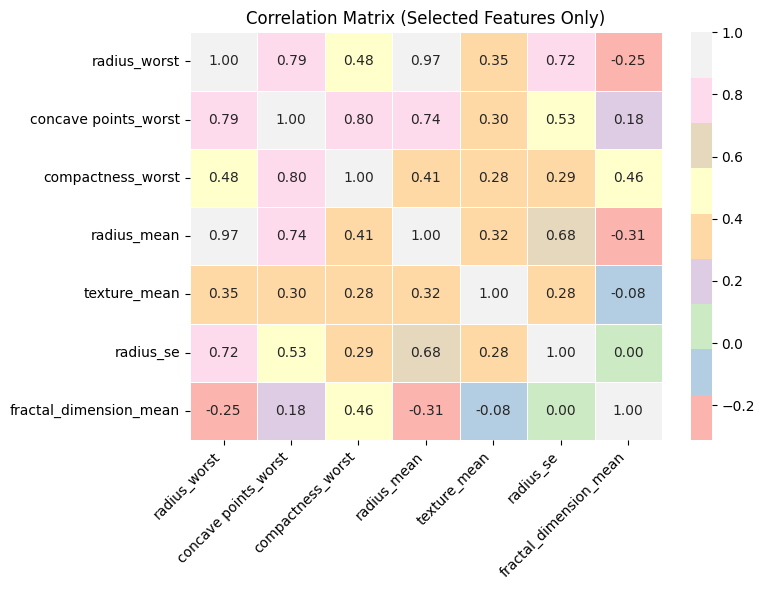

In [ ]:
corr_selected = X.corr()

#Plot heatmap for selected features
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_selected,
    annot=True,
    cmap='Pastel1',
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix (Selected Features Only)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Task 2: Data Preparation
We will do the data preparation for the selected features.
Check for Missing Values:

In [ ]:
missing_counts = X.isnull().sum()
print("Missing values per feature:\n")
print(missing_counts)


Missing values per feature:

radius_worst              0
concave points_worst      0
compactness_worst         0
radius_mean               0
texture_mean              0
radius_se                 0
fractal_dimension_mean    0
dtype: int64


There was no missing value in the selected features


**Scalling:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# StandardScale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train/Test Split:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,       # 30% for test, 70% for train
    random_state=42,      # ensures reproducibility
    stratify=y
)

# Task 3&4: Model Training & Evaluation

**Model Training:**
In this part we will choose 5 classifiers and train them on the scaled and splitted data:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Instantiate each model with default hyperparameters

lr = LogisticRegression()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

# Fit each model on the scaled training data (X_train, y_train)
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

print("Models trained with default hyperparameters:")
print(f"  • Logistic Regression: {lr}")
print(f"  • SVM:                  {svm}")
print(f"  • Decision Tree:        {dt}")
print(f"  • Random Forest:        {rf}")
print(f"  • KNN:                  {knn}")

Models trained with default hyperparameters:
  • Logistic Regression: LogisticRegression()
  • SVM:                  SVC()
  • Decision Tree:        DecisionTreeClassifier()
  • Random Forest:        RandomForestClassifier()
  • KNN:                  KNeighborsClassifier()


**Evaluate the models:**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Generate predictions (label 0 or 1) on X_test for each trained model
y_pred_lr  = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt  = dt.predict(X_test)
y_pred_rf  = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

#Define a helper to compute and print metrics for one model
def print_metrics(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name}:")
    print(f"  • Accuracy  = {acc:.3f}")
    print(f"  • Precision = {prec:.3f}")
    print(f"  • Recall    = {rec:.3f}")
    print(f"  • F1‐Score  = {f1:.3f}")
    print()

#Metrics for each model
print_metrics("Logistic Regression", y_test, y_pred_lr)
print_metrics("SVM",                 y_test, y_pred_svm)
print_metrics("Decision Tree",       y_test, y_pred_dt)
print_metrics("Random Forest",       y_test, y_pred_rf)
print_metrics("KNN",                 y_test, y_pred_knn)

Logistic Regression:
  • Accuracy  = 0.936
  • Precision = 0.982
  • Recall    = 0.844
  • F1‐Score  = 0.908

SVM:
  • Accuracy  = 0.918
  • Precision = 1.000
  • Recall    = 0.781
  • F1‐Score  = 0.877

Decision Tree:
  • Accuracy  = 0.947
  • Precision = 0.951
  • Recall    = 0.906
  • F1‐Score  = 0.928

Random Forest:
  • Accuracy  = 0.971
  • Precision = 1.000
  • Recall    = 0.922
  • F1‐Score  = 0.959

KNN:
  • Accuracy  = 0.936
  • Precision = 1.000
  • Recall    = 0.828
  • F1‐Score  = 0.906



**Plotting Confusion Matrix For Each Model**

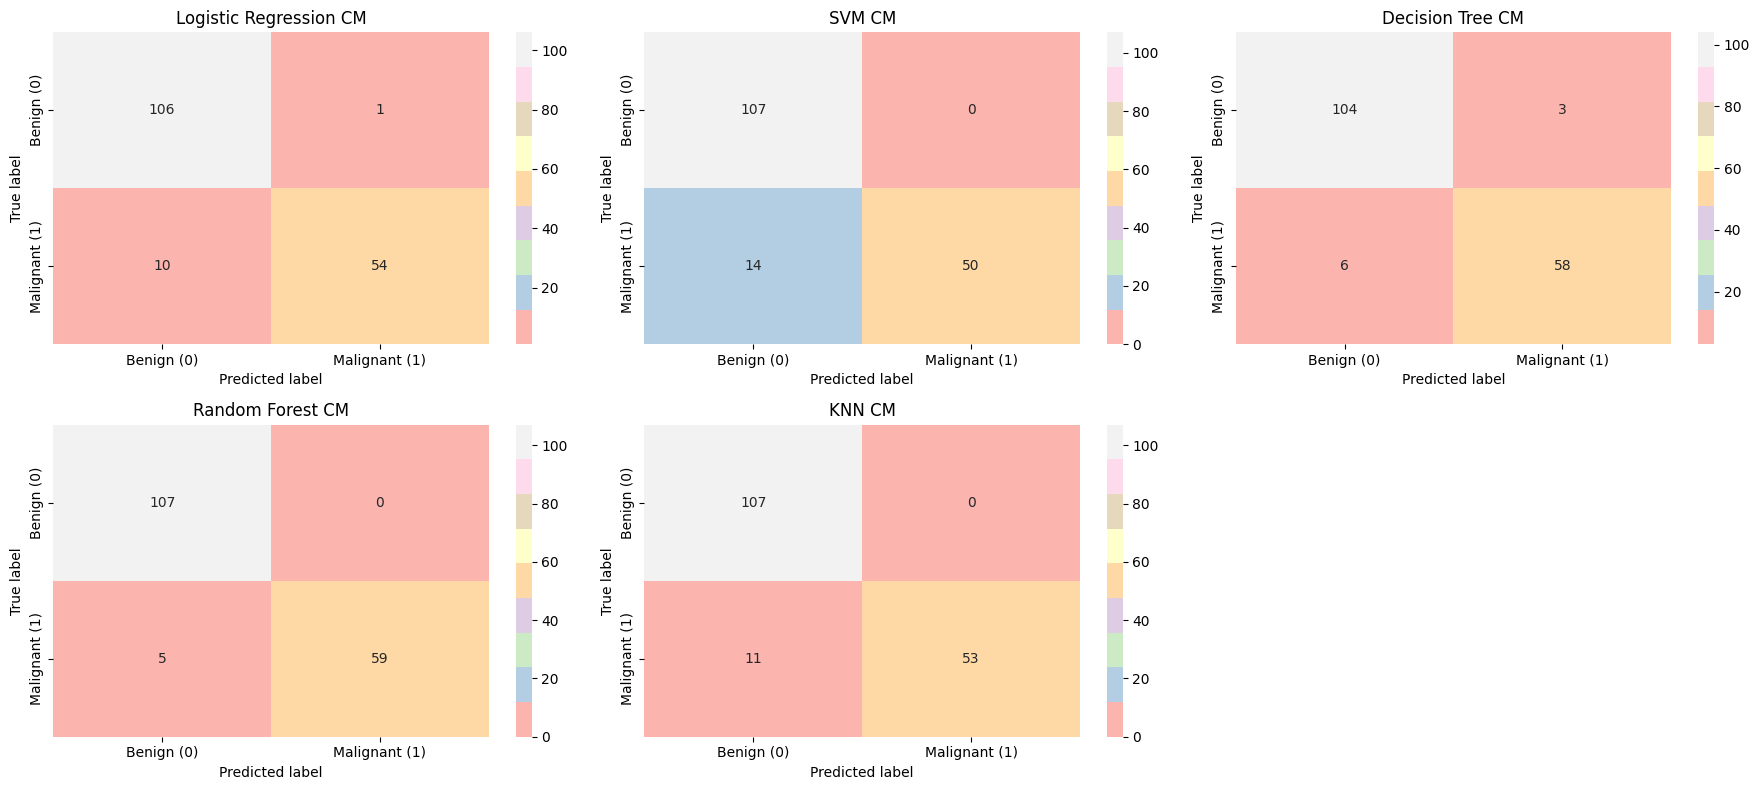

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion(y_true, y_preds, titles):
    plt.figure(figsize=(18, 8))

    for i, (y_pred, title) in enumerate(zip(y_preds, titles)):
        plt.subplot(2, 3, i+1)
        cm = confusion_matrix(y_true, y_pred)
        labels = ['Benign (0)', 'Malignant (1)']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1',
                    xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.title(title)

    plt.tight_layout()
    plt.show()

# Plot confusion matrices for all models
y_preds = [y_pred_lr, y_pred_svm, y_pred_dt, y_pred_rf, y_pred_knn]
titles = ["Logistic Regression CM", "SVM CM", "Decision Tree CM",
          "Random Forest CM", "KNN CM"]

plot_confusion(y_test, y_preds, titles)

**ROC Curves and AUC**

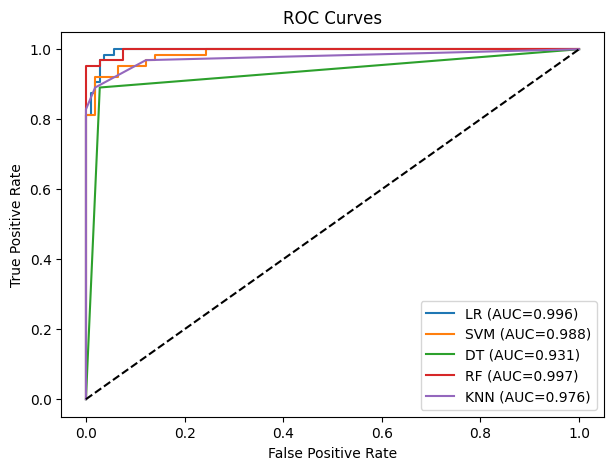

In [ ]:
from sklearn.metrics import roc_curve, auc


# Compute ROC curves and AUC

y_score_lr  = lr.predict_proba(X_test)[:, 1]
fpr_lr,  tpr_lr,  _ = roc_curve(y_test, y_score_lr)
roc_auc_lr  = auc(fpr_lr,  tpr_lr)

y_score_svm = svm.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

y_score_dt  = dt.predict_proba(X_test)[:, 1]
fpr_dt,  tpr_dt,  _ = roc_curve(y_test, y_score_dt)
roc_auc_dt  = auc(fpr_dt,  tpr_dt)

y_score_rf  = rf.predict_proba(X_test)[:, 1]
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, y_score_rf)
roc_auc_rf  = auc(fpr_rf,  tpr_rf)

y_score_knn = knn.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# 3. Plot all ROC curves
plt.figure(figsize=(7, 5))
plt.plot(fpr_lr,  tpr_lr,  label=f'LR (AUC={roc_auc_lr:.3f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC={roc_auc_svm:.3f})')
plt.plot(fpr_dt,  tpr_dt,  label=f'DT (AUC={roc_auc_dt:.3f})')
plt.plot(fpr_rf,  tpr_rf,  label=f'RF (AUC={roc_auc_rf:.3f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC={roc_auc_knn:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

I select Random Forest for further fine-tuning using GridSearchCV:



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Define a simple grid of hyperparameters for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],        # number of trees in the forest
    'max_depth': [None, 10, 20],           # maximum depth of each tree
    'min_samples_split': [2, 5],           # min. samples required to split an internal node
    'min_samples_leaf': [1, 2]             # min. samples required to be at a leaf node
}


# Set up GridSearchCV

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,         #5‐fold cross‐validation on the training set
    scoring='f1', #we want the combination that maximizes F1‐score
    n_jobs=-1,        # use all cores to speed up #for parallel processing
    verbose=1         # print progress
)

grid_search.fit(X_train, y_train) # Fit GridSearchCV on the (scaled) training data


print("Best hyperparameters found:")
print(grid_search.best_params_)
print(f"Best cross‐val F1‐score: {grid_search.best_score_:.3f}")

#It uses the best estimator to predict on the test set
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the  model  after fine tuning on the test set
from sklearn.metrics import classification_report, roc_auc_score

print("\nClassification report on test set (tuned RF):")
print(classification_report(y_test, y_pred_best_rf, target_names=['Benign', 'Malignant']))

y_score_best_rf = best_rf.predict_proba(X_test)[:, 1]
best_rf_auc = roc_auc_score(y_test, y_score_best_rf)
print(f"Test‐set AUC (tuned RF): {best_rf_auc:.3f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters found:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best cross‐val F1‐score: 0.942

Classification report on test set (tuned RF):
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98       107
   Malignant       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Test‐set AUC (tuned RF): 0.997


**Setting Random Forest Hyperparameters:**
*Hyperparameters* are the settings that control the structure and behavior of a learning algorithm. But we pick them before training the data and they are not learned automatically from the data.  
***Tuning ***means to try different settings and values for these parameters in order to get the best performance from the model on validation data.
There are 4 hyperparameters in Random Forest which should be tuned which are:
*   n_estimators (number of trees): We need to choose a number that is not too little to cause underfitting or too much to cause long training time. Based on best practices, a dataset with this size values like 50, 100, or 200 works well.
*   max_depth (maximum depth of each tree): The default value (None) which will cause trees to grow till their leaves are pure may cause overfitting, and small depth will cause underfitting (not capture enough detail). We can have a combination of None, and moderate depth like 10 and 20
*   min_samples_leaf (minimum number of samples required to be at a leaf node): If we keep the default value which is 1, it might lead to overfitting. Also having large numbers may lead to generalization. We will try 1,2 or 5.
*   min_samples_split (minimum number of samples required to split a node): The default value (2), might lead to very deep trees which equals overfitting. I tried 2,5,10




**Compare model's performance before vs. after tuning:**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Compute metrics for old RF
acc_old   = accuracy_score(y_test, y_pred_rf)
prec_old  = precision_score(y_test, y_pred_rf)
rec_old   = recall_score(y_test, y_pred_rf)
f1_old    = f1_score(y_test, y_pred_rf)
auc_old   = roc_auc_score(y_test, y_score_rf)

# Compute metrics for tuned RF
y_pred_tuned = best_rf.predict(X_test)
y_score_tuned = best_rf.predict_proba(X_test)[:, 1]

acc_new  = accuracy_score(y_test, y_pred_tuned)
prec_new = precision_score(y_test, y_pred_tuned)
rec_new  = recall_score(y_test, y_pred_tuned)
f1_new   = f1_score(y_test, y_pred_tuned)
auc_new  = roc_auc_score(y_test, y_score_tuned)

print("Random Forest Performance Comparison")
print(f"{'Metric':<10} {'Before':>8} {'After':>8}")
print(f"Accuracy    {acc_old:.3f}   {acc_new:.3f}")
print(f"Precision   {prec_old:.3f}   {prec_new:.3f}")
print(f"Recall      {rec_old:.3f}   {rec_new:.3f}")
print(f"F1‐Score    {f1_old:.3f}   {f1_new:.3f}")
print(f"AUC         {auc_old:.3f}   {auc_new:.3f}")

Random Forest Performance Comparison
Metric       Before    After
Accuracy    0.971   0.971
Precision   1.000   1.000
Recall      0.922   0.922
F1‐Score    0.959   0.959
AUC         0.997   0.997
